# **LIBRARY**

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# **LOADING DATA**

In [3]:
path = '/content/Bank Customer Churn Prediction.csv'
df = pd.read_csv(path)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
df.shape

(10000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Dapat diketahui bahwa pada dataset ini terdapat 10000 baris dengan 11 atribut dimana atribut-atribut tersebut terdiri dari 9 kolom dengan tipe numerik dan 2 kolom dengan tipe kategorik.


# **DATA UNDERSTANDING**

Proses ini bertujuan untuk mempelajari data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

Frekuensi Nilai pada Variabel 'Churn'

In [8]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


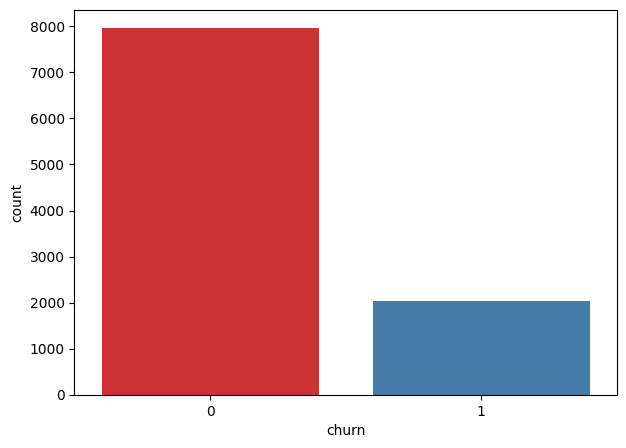

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="churn", data=df, palette="Set1")
plt.show()

Nilai dan Distribusi Statistik Masing - Masing Kolom

In [10]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Visualisasi dengan Histogram

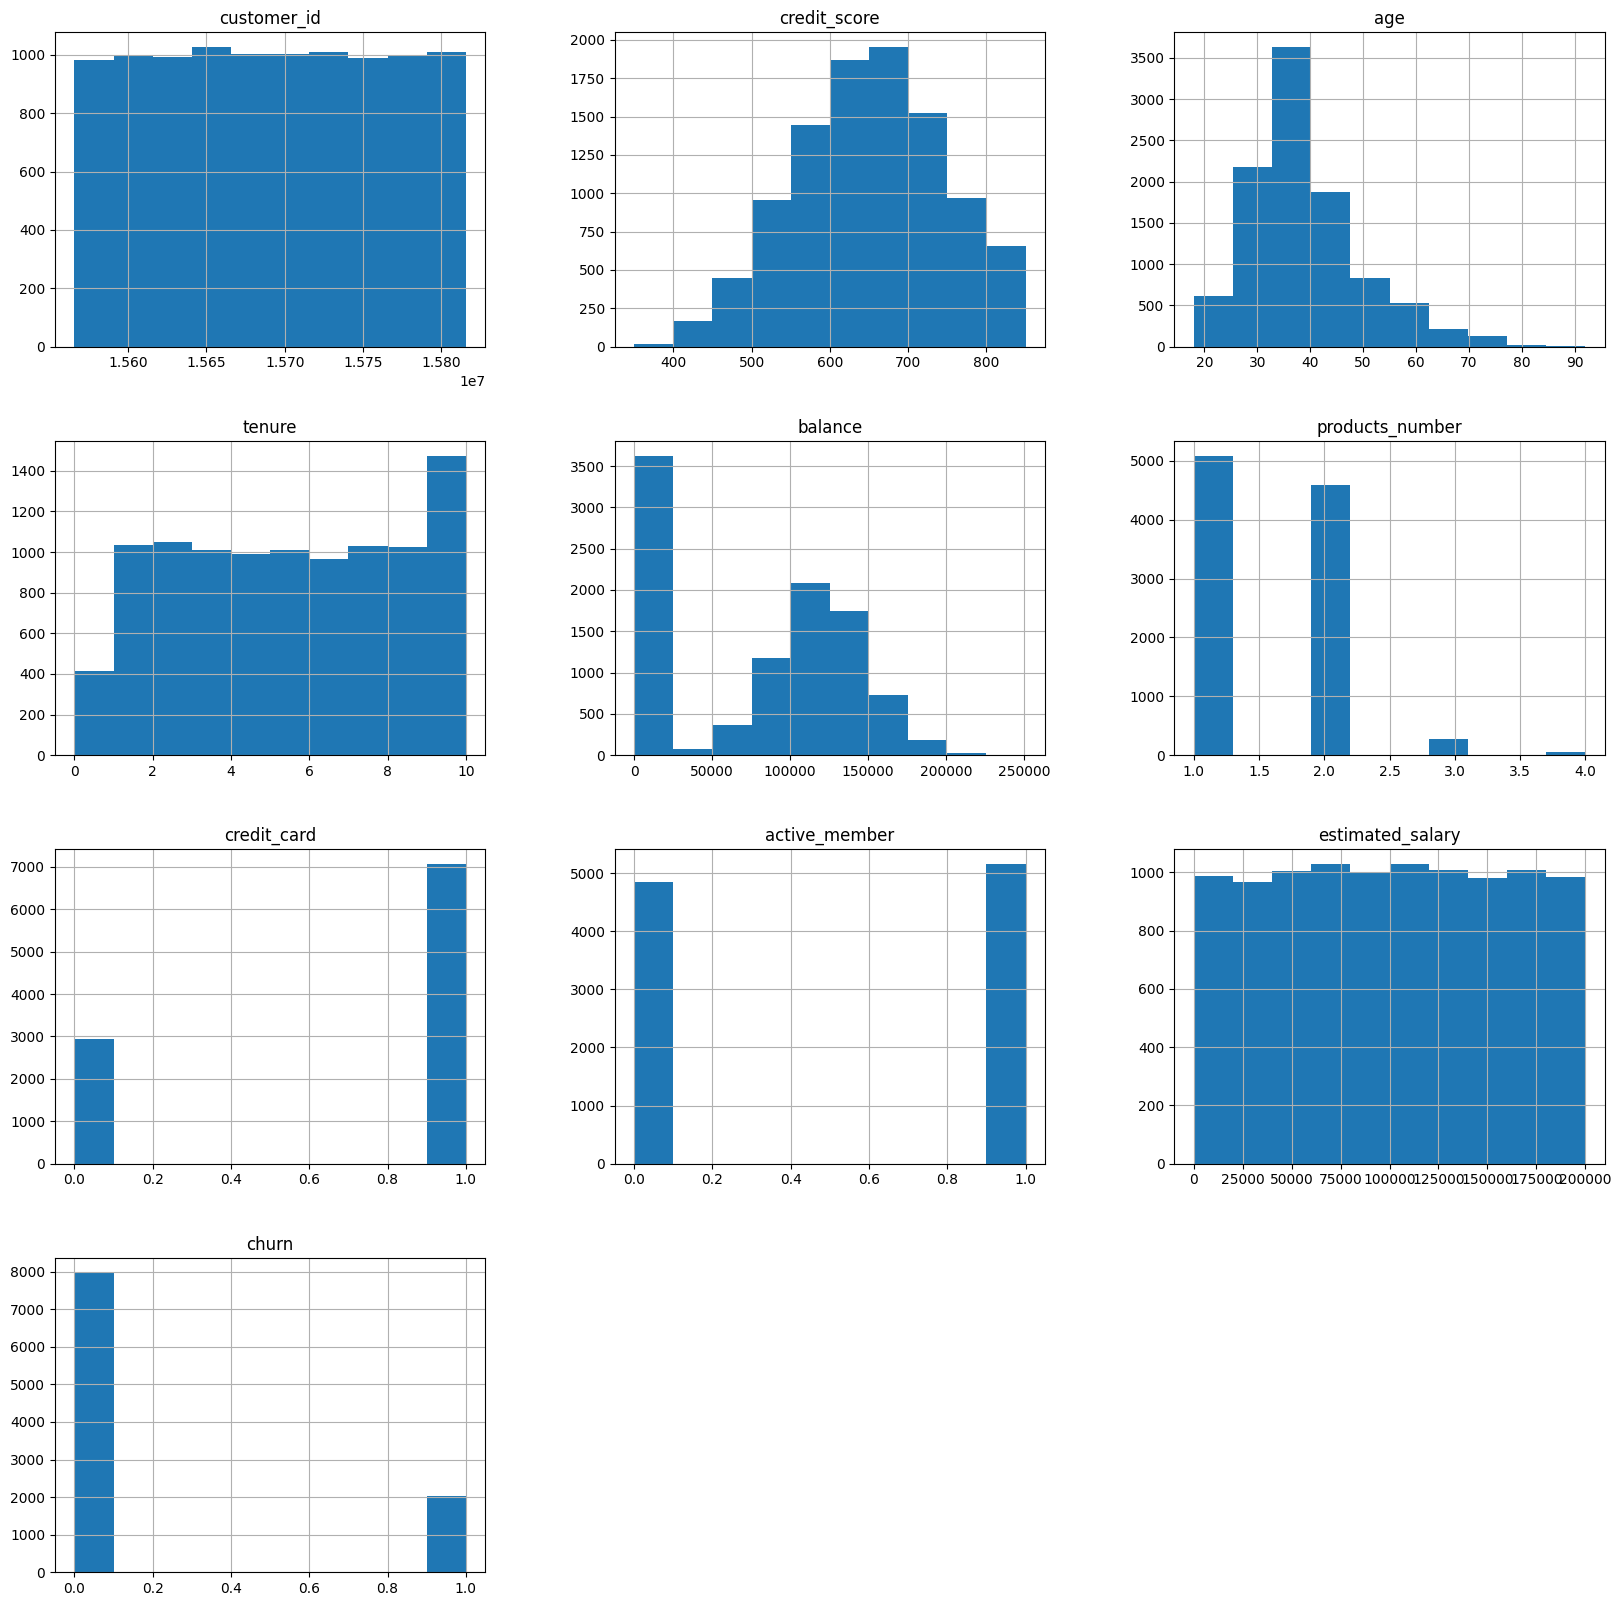

In [11]:
df.hist(figsize=(20, 20))
plt.show()

Visualisasi dengan Box Plot

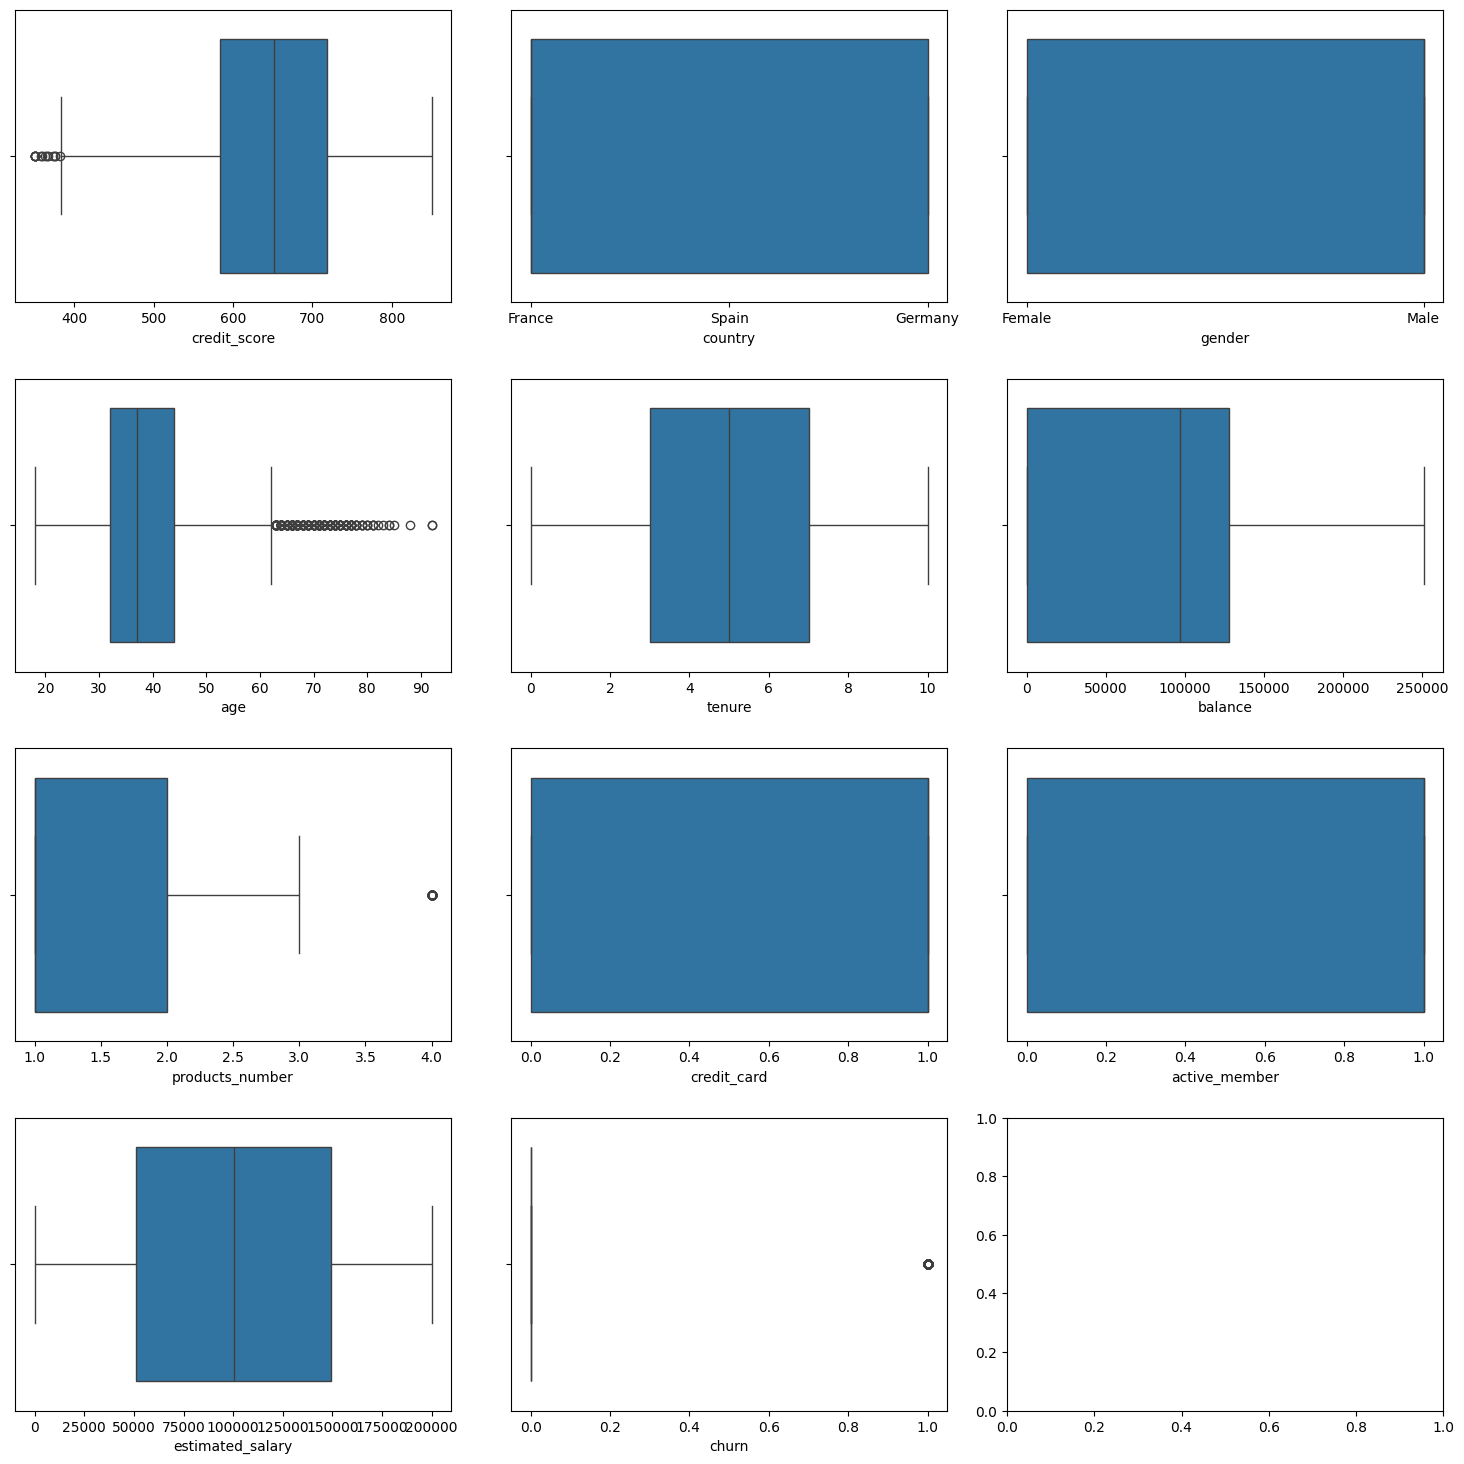

In [12]:
cols = ['credit_score',	'country', 'gender',	'age',	'tenure', 'balance',	'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

fig, ax = plt.subplots(4, 3, figsize=(15, 15)) # 2 baris, 5 kolom
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i])

fig.tight_layout(pad=2.0)
plt.show()

Berdasarkan Output Nilai dan Distribusi Statistik, Histogram, dan Box Plot dari masing - masing kolom, dapat diketahui informasi berikut :
1. Rata-rata usia nasabah yang menjadi target churn prediction adalah sekitar 39 tahun, dengan usia termuda 18 tahun dan tertua 92 tahun. Jumlah nasabah terbanyak yang menjadi target berada pada rentang usia 30-40 tahun
2. Rata-rata skor kredit nasabah sekitar 675, dengan skor terendah 350 dan tertinggi 850. Sebagian besar nasabah memiliki skor kredit di kisaran 600-750. Terdapat beberapa nasabah dengan skor kredit yang sangat rendah (di bawah 400) dan sangat tinggi (di atas 850), yang mengindikasikan adanya outlier.
3. Mayoritas nasabah memiliki saldo di bawah 100.000 dengan saldo terendah mendekati 0 dan tertinggi lebih dari 250.000. Terdapat konsentrasi nasabah dengan saldo di bawah 50.000, yang menunjukkan bahwa sebagian besar nasabah memiliki saldo relatif rendah.
4. Masa jabatan nasabah terdistribusi cukup merata, dengan rata-rata sekitar 5 tahun.
5. Mayoritas nasabah memiliki 1 atau 2 produk, dengan hanya sebagian kecil nasabah yang memiliki 3 atau 4 produk
6. Gaji estimasi nasabah terdistribusi relatif merata di antara 0 hingga 200.000.
7.  Target variabel 'churn' menunjukkan data tidak seimbang (imbalanced), dengan lebih banyak nasabah yang tidak churn (0) dibandingkan dengan nasabah yang churn (1).
8. Distribusi saldo dan gaji estimasi bervariasi sedikit di antara negara-negara. Sebagai contoh, nasabah di Jerman cenderung memiliki saldo yang lebih tinggi dibandingkan dengan nasabah di Perancis dan Spanyol
9. Terdapat perbedaan distribusi saldo dan gaji estimasi antar jenis kelamin. Sebagai contoh, nasabah pria cenderung memiliki saldo yang sedikit lebih tinggi dibandingkan dengan nasabah wanita.
10. Mayoritas nasabah memiliki kartu kredit namun distribusi data cenderung tidak seimbang.
11. Jumlah nasabah yang aktif dan tidak aktif relatif seimbang, meskipun sedikit lebih banyak nasabah yang tidak aktif.

Dari hasil pemeriksaan data duplikat dan missing values, dapat disimpulkan bahwa data  sudah bersih dan tidak memerlukan penanganan lebih lanjut untuk data duplikat dan missing values.

# **DATA PREPARATION**




 Proses ini bertujuan untuk memeriksa apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [13]:
df = df.drop(['customer_id'], axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [16]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

# **ONE HOT ENCODING**

In [18]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

# **Standarisasi Data**

Menstandarisasi fitur numerik agar semua fitur memiliki bobot yang sama dalam pembelajaran model yang akan mempermudah interpretasi hasil model

In [19]:
# Standarisasi dengan StandardScaler
df_scalling = df[['credit_score', 'age', 'tenure', 'balance', 'products_number','estimated_salary']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features,columns = df_scalling.columns)
df_scalling.head()

,credit_score,age,tenure,balance,products_number,estimated_salary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [20]:
import joblib

joblib.dump(StandardScaler, 'StandardScaler_model.pkl')

print("Models have been saved!")

Models have been saved!


In [21]:
df_scalling['gender'] = df['gender']
df_scalling['country'] = df['country']
df_scalling['credit_card'] = df['credit_card']
df_scalling['active_member'] = df['active_member']
df_scalling.head()

,credit_score,age,tenure,balance,products_number,estimated_salary,gender,country,credit_card,active_member
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,1,1


# **Oversampling Data**

Mengatasi masalah ketidakseimbangan kelas (class imbalance) pada data

In [22]:
X = df.drop('churn', axis=1)
y = df['churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [25]:
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Jumlah data sebelum oversampling:", len(df))
print("Jumlah data setelah oversampling:", len(X_resampled))

resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['churn'])], axis=1)
resampled_data.to_csv('oversampled_data.csv', index=False)

Jumlah data sebelum oversampling: 10000
Jumlah data setelah oversampling: 15926


In [26]:
data = pd.read_csv('/content/oversampled_data.csv')
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [27]:
data['churn'].value_counts()

,count
churn,
1,7963
0,7963


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      15926 non-null  int64  
 1   country           15926 non-null  int64  
 2   gender            15926 non-null  int64  
 3   age               15926 non-null  int64  
 4   tenure            15926 non-null  int64  
 5   balance           15926 non-null  float64
 6   products_number   15926 non-null  int64  
 7   credit_card       15926 non-null  int64  
 8   active_member     15926 non-null  int64  
 9   estimated_salary  15926 non-null  float64
 10  churn             15926 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.3 MB


In [29]:
data.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


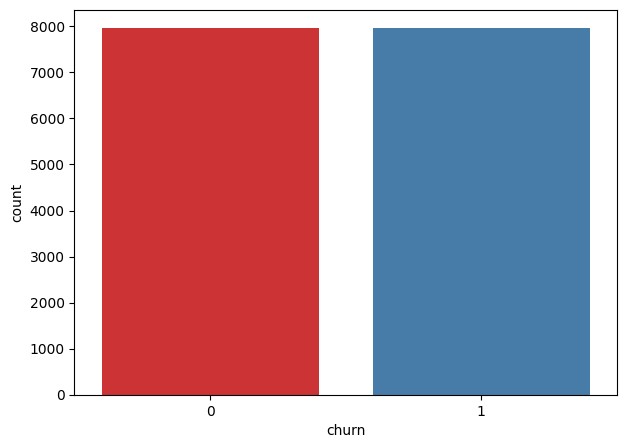

In [30]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="churn", data=data, palette="Set1")
plt.show()

# **Feature Engineering**

In [31]:
sc= StandardScaler()
X_train_rescaled = sc.fit_transform(X_train)
X_test_rescaled = sc.transform(X_test)
y_train_rescaled = sc.fit_transform(y_train.values.reshape(-1, 1))
y_test_rescaled = sc.transform(y_test.values.reshape(-1, 1))

In [32]:
X_train_rescaled

array([[ 0.35649971, -0.90598864,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [33]:
# pd.DataFrame(X_train_rescaled, columns=X_train.columns).to_csv('X_train_res.csv', index=False)

In [34]:
X_test_rescaled

array([[-0.57749609,  1.50315516,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.90598864,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  0.29858326, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.90598864, -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.90598864,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]])

In [35]:
# pd.DataFrame(X_test_rescaled, columns=X_test.columns).to_csv('X_test_res.csv', index=False)

In [36]:
y_test_rescaled

array([[-0.50857963],
       [-0.50857963],
       [-0.50857963],
       ...,
       [ 1.96626042],
       [ 1.96626042],
       [ 1.96626042]])

In [37]:
# pd.DataFrame(y_test_rescaled).to_csv('y_test_res.csv', index=False)

In [38]:
y_train_rescaled

array([[-0.50857963],
       [-0.50857963],
       [ 1.96626042],
       ...,
       [ 1.96626042],
       [ 1.96626042],
       [-0.50857963]])

In [39]:
# pd.DataFrame(y_train_rescaled).to_csv('y_train_res.csv', index=False)

Berdasarkan analisis heatmap korelasi, dapat disimpulkan bahwa beberapa fitur seperti products_number dan estimated_salary memiliki korelasi yang relatif lebih tinggi dengan churn dibandingkan fitur-fitur lain seperti credit_score dan tenure. Hal ini menunjukkan bahwa keragaman produk yang digunakan dan gaji nasabah mungkin merupakan faktor yang lebih penting untuk dipertimbangkan dalam memprediksi dan mencegah churn.

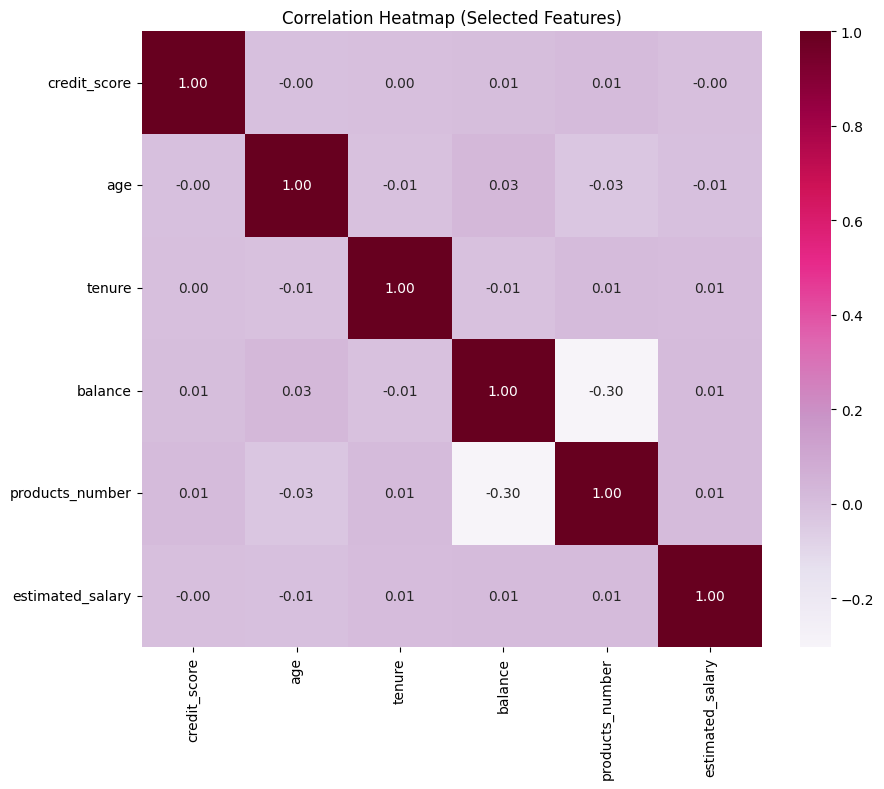

In [40]:
selected_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number','estimated_salary']
filtered_df = df[selected_features]
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

# **Pendefinisian Model**

Visualisasi Data

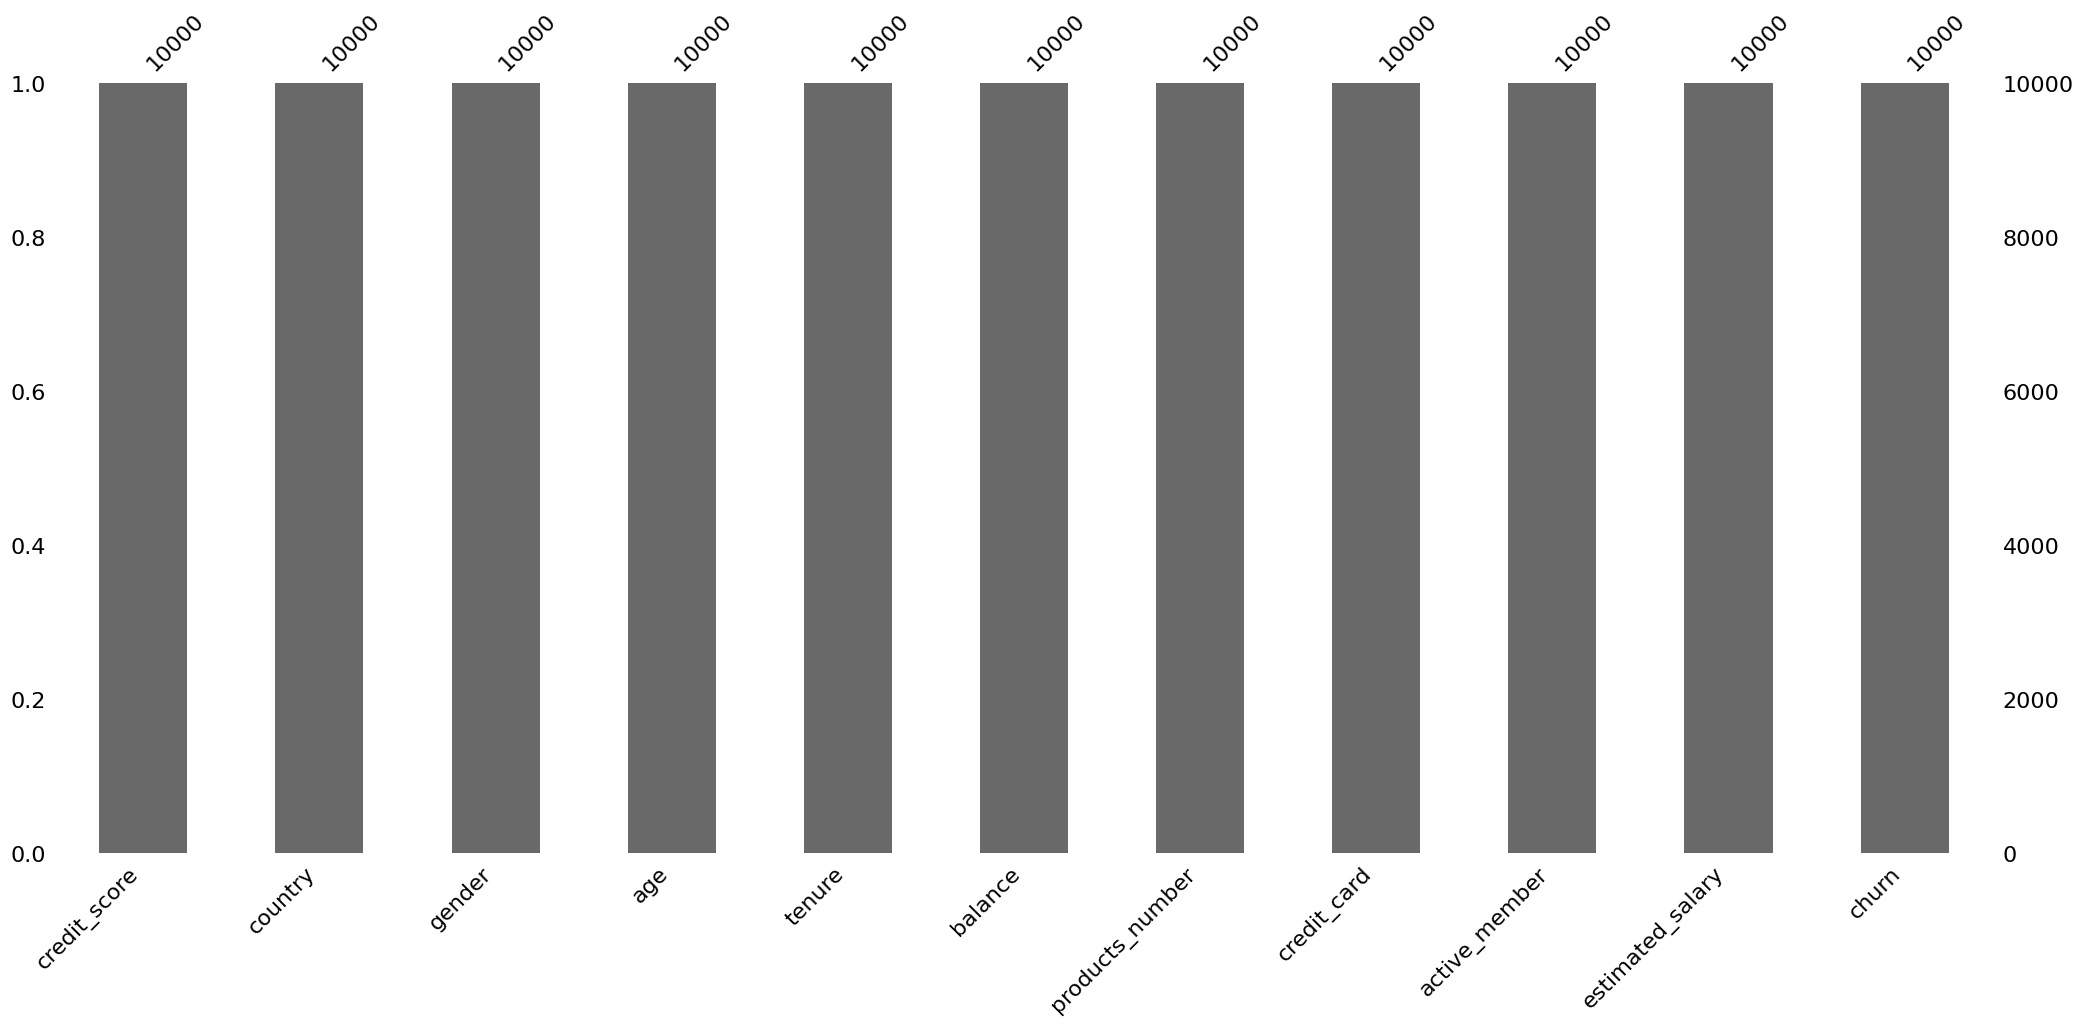

In [57]:
msno.bar(df)
plt.show()

In [58]:
X_resampled.shape

(15926, 10)

In [59]:
y_resampled.shape

(15926,)

In [60]:
X_resampled

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.000000,1,1,1,101348.880000
1,608,1,0,41,1,83807.860000,1,0,1,112542.580000
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000
3,699,0,0,39,1,0.000000,2,0,0,93826.630000
4,850,1,0,43,2,125510.820000,1,1,1,79084.100000
...,...,...,...,...,...,...,...,...,...,...
15921,773,2,0,47,5,108732.431561,1,1,0,184555.335538
15922,465,2,0,56,7,127070.846317,1,1,0,51834.800300
15923,603,2,0,32,3,102755.340078,2,0,0,189755.014496
15924,732,0,0,47,5,0.000000,3,1,0,89933.242727


In [61]:
y_resampled

,churn
0,1
1,0
2,1
3,0
4,0
...,...
15921,1
15922,1
15923,1
15924,1


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.20)

In [63]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(12740, 10) (3186, 10) (12740,) (3186,)


In [64]:
X_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
13555,756,0,0,48,5,109398.022892,1,0,0,184011.804544
1665,749,0,1,42,1,129776.720000,2,0,1,143538.510000
14878,595,0,1,35,2,146014.742913,1,1,0,56085.107848
7471,658,2,0,55,8,119327.930000,1,0,1,119439.660000
2582,656,0,0,46,5,113402.140000,2,1,1,138849.060000
...,...,...,...,...,...,...,...,...,...,...
13418,532,0,0,29,4,129039.901489,1,0,0,149267.790040
5390,735,0,0,38,1,0.000000,3,0,0,92220.120000
860,667,0,1,43,8,190227.460000,1,1,0,97508.040000
15795,727,1,0,59,8,94769.486548,2,1,0,157463.875398


In [65]:
y_train

,churn
13555,1
1665,0
14878,1
7471,0
2582,0
...,...
13418,1
5390,1
860,1
15795,1


# **Model Development**

# **DECISION TREE HYPER PARAMETER**

In [68]:
from collections import Counter
import numpy as np

class decision_Tree:

    def __init__(self):

        # hyper parameters
        self.no_of_unique=6  # Number of unique values that should be present for a feature to be categorized as categorical or continuous
        self.counter=0 # counter to count the current depth of tree
        self.min_samples=15 # sample rate
        self.max_depth=10 #control depth of tree

    # The function is used to categorize the columns as continuous or categorical features
    # if the availabe no of unique values of a column is greater than 6 then it can be classified as continues
    # else as categorial
    def type_of_cols(self,data):

        # initialize lists to store column type
        col_type=[]

        # move in each column
        for col in data.columns[:-1]:
            # get number of unique values in the feature
            no_of_col_unique= data[col].nunique()

            # check for categorical feature
            if data[col].dtypes==object or no_of_col_unique < self.no_of_unique:
                col_type.append("categorical")

            # if not categorical then it is a continuous feature
            else:
                col_type.append("continuous")

        # return the feature type list
        return col_type

    # the function is used to get all possible splits for the data
    def get_splits(self,data):

        splits = {} # dictonary That saves the possible splits of our data based on data-type
        feature_type=self.type_of_cols(data) # Get data-type categorical or continuous for each column

        # moving in for each feature excluding the last column which is the label
        for column_index in range(data.shape[1]-1):

            values = data.iloc[:, column_index] # getting all the feature value based on the feature names
            unique_values = np.unique(values) #fetch the unique values of the respective features
            type_of_feature = feature_type[column_index] # get data-type of column i.e categorial or continues

            # handling spkit for continuous data
            if type_of_feature == "continuous":
                splits[column_index] = []

                # passing through all unique values
                for index in range(len(unique_values)):
                    if index != 0:
                        current_value = unique_values[index]
                        previous_value = unique_values[index - 1]
                        split = (current_value + previous_value) / 2 # performing split
                        splits[column_index].append(split) #saving the split

            # for a categorical feature ther must be at least 2 unique values, else in the
            # split_data function data_below would contain all data points and data_above would be None
            # thus checking for the above mentioned situation as well
            elif len(unique_values) > 1:
                splits[column_index] = unique_values

        # return splits
        return splits

    # spliting the data wrt to above mentioned situation
    def split_data(self,data, column, value):

        #based on to column's data type we will destribute the data into two partitions
        feature_type=self.type_of_cols(data)
        split_values = data.iloc[:,column]
        type_of_feature = feature_type[column]

        # in case of continues data we will use greater or lesser than operator
        if type_of_feature == "continuous":
            left = data[split_values <= value]
            right = data[split_values >  value]

        # in case of categorial data will use logical equal or not equal operator
        else:
            left = data[split_values == value]
            right = data[split_values != value]

        return left,right

    # let's work on functions to calculate the entropy
    # the code uses entropy to calculate the split
    # we can also make use of gini index or gini impurity for the task
    def entropy(self,data):
        # we are calculating the entropy
        prob=list(dict(data.iloc[:, -1].value_counts(normalize=True)).values())
        entropy = sum(prob* -np.log2(prob))
        return entropy

    # entropy of sub-splits tree
    def entropy_data(self,left,right):
        n = len(left) + len(right)
        p_left = len(left) / n
        p_right = len(right) / n
        entropy_ =  (p_left * self.entropy(left)+ p_right *self.entropy(right))
        return entropy_

    # based on the entropy let's calculate the best splits
    def best_split(self,data,splits):

        entropy = 99999 #we assume a dummy entropy to compare with obtained entropy for the initial time

        # iterating over the splits obtained by the get_split method for each feature
        for col in splits:

            # iterating over the splits of a indivisual feature
            for val in splits[col]:

                # spliting the data according to obtained split(val) of a column
                left, right = self.split_data(data, column=col, value=val)

                # calculating the entropy for the column
                current_entropy = self.entropy_data(left,right)

                # in case where obtained entropy is lesser than assumed entropy
                # then assume the obtained entropy as best entropy
                # and the current column can be termend as best column and the split too
                if current_entropy <= entropy:
                    entropy = current_entropy
                    best_column = col
                    best_split = val

        # return best split and column
        return best_column, best_split

    # for the next step let's work on a function to build our decision tree
    # it is the base function for fitting the data
    def _tree_builder(self,df):

        # data preparations
        column=df.columns #store the column name
        feature_type=self.type_of_cols(df) # store the column value type i.e categorial/continues
        data = df

        # base case for recursion
        # checking for hyper-parameter conditions
        if  (df.iloc[:,-1].nunique()==1) or (len(data) < self.min_samples) or (self.counter == self.max_depth):
            classes= Counter(df.iloc[:,-1]).most_common(1)[0][0]
            return classes

        # recursive part
        else:
            self.counter += 1
            splits = self.get_splits(data)# calculating the splits of each columns
            split_column, split_value = self.best_split(data,splits) # getting the best column and split value
            left, right = self.split_data(data, split_column, split_value) # based on the above split and column divide the data

            # for better visualization of tree
            # after training we can see the tree in the {object}.tree variable
            # determine question
            # here we are trying to ask the question if our feature and split value have completed the classification task or not
            # also adding to this we also keep track of the base while recursion

            feature_name = column[split_column] # pick the column name
            type_of_feature = feature_type[split_column] # get type of the column

            # in case of a feature with continuous values we have right and left sub tree based on condition
            # The values in the dataset of the particular feature are less than or equals to the best split value
            if type_of_feature == "continuous":
                question = "{} <= {}".format(feature_name, split_value)

            # feature is categorical
            # we have a question if the values from the dataset is equal to the optimal categorical split value or not
            else:
                question = "{} = {}".format(feature_name, split_value)

            # print(question)
            # instantiate sub-tree
            # saving the question asked earlier
            mytree = {question: []}

            # find answers (recursion)
            # work on building right and left sub trees
            ans_yes = self._tree_builder(left) # left leave is for yes where tree traversal stops
            ans_no = self._tree_builder(right) # right leave needs few more nodes


            # If the answers are the same, then there is no point in asking the question.
            # This could happen when the data is classified even though it is not pure
            # yet (min_samples or max_depth base case).
            if ans_yes == ans_no:
                mytree = ans_yes
            else:
                mytree[question].append(ans_yes)
                mytree[question].append(ans_no)

            # return the constructed tree
            return mytree

    # Fit function is used to fit the data or simply construct the decision tree
    # It uses _tree_builder function to construct the decision tree
    def fit(self,X,y):

        # sending complete data as input with last column as our target feature
        X["output"]=y

        # calling the tree builder function
        self.tree=self._tree_builder(X)
        return self.tree

    # base predict function
    def _predict(sf,dx,tree):
        root_node = list(tree.keys())[0] # fetch the root node's value i.e our dict keys which consits of column name,operator and split value
        column,operator,split=root_node.split(" ") # we have used the space as a seprator b/w the three data
        if operator == "<=": # if the operator is lesser than or equal it means th column type is continues

            if dx[column] <= float(split):
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]

        # if column  is categorical then we can use logical equal operator
        else:
            if str(dx[column]) == split:
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]

        if type(result)!=dict: # if the result is dict then we have more nodes to be traversed
            return result

        # else recursively travers the entire tree for accurate results
        else:
            return sf._predict(dx,result)

    # The function is used to predict the output
    # It uses _predict private function to get the output for each data point
    def predict(self,X_test):
        s=[] # list to save the result

        # predict output for each test case
        for i in range(X_test.shape[0]):
            s.append(self._predict(X_test.iloc[i],self.tree))

        # return the result
        return s

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 10), (3186, 10), (12740,), (3186,))

In [70]:
myalgo=decision_Tree()
myalgo.fit(X_train,y_train)

# printing the tree
print(myalgo.tree)

{'age <= 40.5': [{'products_number = 2': [{'active_member = 1': [{'balance <= 108272.54500000001': [{'gender = 1': [{'age <= 29.5': [{'estimated_salary <= 102439.08': [{'estimated_salary <= 55613.135': [0, {'estimated_salary <= 99381.245': [{'estimated_salary <= 57031.33': [1, 0]}, 1]}]}, 0]}, 0]}, 0]}, 0]}, 0]}, 0]}, 1]}


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1633
           1       0.70      0.68      0.69      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



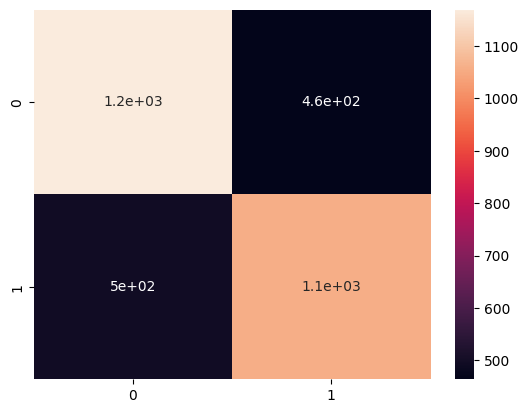

In [71]:
y_pred = myalgo.predict(X_test)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test,y_pred))

In [72]:
import joblib

joblib.dump(decision_Tree, 'DecisionTree_model.pkl')

print("Models have been saved!")

Models have been saved!


# **RANDOM FOREST**

In [73]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

In [74]:
# coding: utf-8

import pandas as pd
import random


# 1. Train-Test-Split
def train_test_split(df, test_size):

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df


# 2. Distinguish categorical and continuous features
def determine_type_of_feature(df):

    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "churn":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types


# 3. Accuracy
def calculate_accuracy(predictions, labels):
    predictions_correct = predictions == labels
    accuracy = predictions_correct.mean()

    return accuracy

In [75]:
random.seed(0)
train_dt, test_dt = train_test_split(data, test_size=0.2) # Changed 'dt' to 'data' assuming 'data' holds the dataframe.

In [76]:
# coding: utf-8

import numpy as np
import pandas as pd
import random


# 1. Decision Tree helper functions
# (see "decision tree algorithm flow chart.png")

# 1.1 Data pure?
def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


# 1.2 Classify
def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification


# 1.3 Potential splits?
def get_potential_splits(data, random_subspace):

    potential_splits = {}
    _, n_columns = data.shape
    column_indices = list(range(n_columns - 1))    # excluding the last column which is the label

    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(population=column_indices, k=random_subspace)

    for column_index in column_indices:
        values = data[:, column_index]
        unique_values = np.unique(values)

        potential_splits[column_index] = unique_values

    return potential_splits


# 1.4 Lowest Overall Entropy?
def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy


def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy


def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value


# 1.5 Split data
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

    # feature is categorical
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]

    return data_below, data_above


# 2. Decision Tree Algorithm
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5, random_subspace=None):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data, random_subspace)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification

        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)

        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)

        # instantiate sub-tree
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, random_subspace)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, random_subspace)

        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree


# 3. Make predictions
# 3.1 One example
def predict_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)


# 3.2 All examples of the test data
def decision_tree_predictions(test_df, tree):
    predictions = test_df.apply(predict_example, args=(tree,), axis=1)
    return predictions

In [77]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]

    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)

    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]

    return random_forest_predictions

              precision    recall  f1-score   support

           0       0.76      0.84      0.79      1607
           1       0.81      0.72      0.77      1578

    accuracy                           0.78      3185
   macro avg       0.78      0.78      0.78      3185
weighted avg       0.78      0.78      0.78      3185



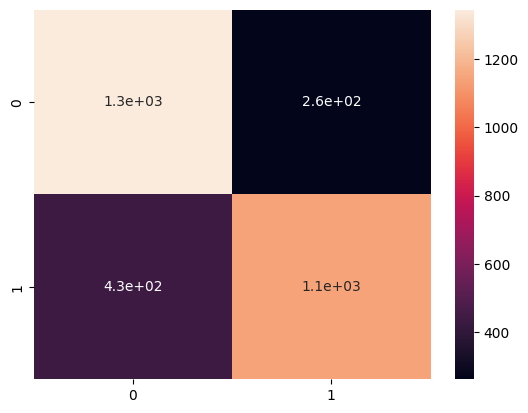

In [78]:
y_test = test_dt["churn"]

forest = random_forest_algorithm(train_dt, n_trees=4, n_bootstrap=800, n_features=2, dt_max_depth=4)
y_pred = random_forest_predictions(test_dt, forest)

# Now y_test and y_pred should have the same length
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred))

In [80]:
import joblib

joblib.dump(forest, 'RandomForest_model.pkl')

print("Models have been saved!")

Models have been saved!
